In [ ]:
#!git clone https://github.com/neuralcomputer/ML_School.git

# Тема 25. Эволюционные вычисления. Генетические алгоритмы и метод роя частиц.

<p align="right"> <i> Как получились динозавры </i> </p>

## Введение
Природа - это огромный сверхмощный компьютер. Многие виды нейронных сетей подсмотрены в природе. Удивительно, как природа может создавать организмы, которые наилучшим образом подходят для решения задач. Супермаскировка? Легко - вот хамелеон, который меняет свой окрас. Высочайщая прочность? Вот хитиновые панцири. Как такое рассчитать? 

Природа идет по пути **эволюции**, *постепенного* изменения свойств организмов с целью повышения их *приспособленности* к жизни.

Но если может природа для живых объектов, можем ли мы использовать такой же принцип для искусственных вычислений? И ответ - можем!

Так появились [**эволюционные вычисления**](https://ru.wikipedia.org/wiki/Эволюционные_алгоритмы), которые используют принцип эволюции для вычислений, а конкретно для оптимизации функций. А как вы знаете, практически все можно свести к задаче оптимизации. Обучение нейронной сети, например, это оптимизация функции ошибки. 

Сегодня придумано много различных эволюционных методов, некоторые имитируют природу, другие отошли от этого. Но у все этих методов есть общие черты:
* используется набор объектов (из называют по-разному: особи, точки, агенты и т.п.)
* эти объекты взаимодействуют между собой
* в результате взаимодействия объекты изменяются и\или создаются новые объекты, похожие но отличающиеся от старых.
* так повторяется до тех пор, пока задача не будет решена.

Разные виды объектов, разные способы взаимодействия - получаются разные методы. Мы познакомимся только с двумя из них.
 

# Метод роя частиц
Очень простой эволюционный метод оптимизации это "метод роя частиц" (particle swarm optimization, PSO). 

В этом методе вводятся несколько объектов-частиц, которые имеют заданные координаты в многомерном пространстве. В этом же пространстве задана функция, которую мы хотим оптимизировать.

Частицы описываются координатами Xi и *скоростью* движения Vi. Число частиц выбирает пользователь, чем больше тем точней будет решение, но и тем дольше оно будет вычисляться.

Симуляция (эволюция) частиц проходит в цикле, где на каждом шаге k пересчитывается значение скорости каждой частицы.

$ V_i(k+1)=V_i(k)+m_{i1}(P_i-X_i(k))+m_{i2}(G-X_i(k)) $

* $P_i$ - лучшее запомненное положение i-ой частицы
* G - глобально лучшее положение среди всех частиц.
* лучшее положение определяется по величине оптимизируемой функции F для этой частицы: если максимизируем, то больше это лучше, если минимизируем, то меньше это лучше. 
* $m_{i1}, m_{i2}$ - случайные числа от 0 до 1.

Другими словами, новая, пересчитанная скорость i-ой частицы на шаге k+1, определяется как сумма:
* старой скорости этой же частицы на шаге k,
* разницы между лучшим положением этой частицы и ее текущим положением, с некоторым случайным множителем
* разницы между лучшим положением среди всех частиц и текущим положением частицы, со случайным множителем.

Получается, частицы как-бы притягиваются, но не полностью, к своим лучшим положениям и к глобально лучшему положению, но из-за случайностей все же могут отдаляться от них. 

Пересчитав скорость частицы, меняем на следующем шаге ее положение

$ X_i(k+1)=X_i(k)+V_i(k+1)$



При изменении положения частиц может измениться и величина оптимизируемой функции для них, если новое положение частицы лучше запомненного лучшего положения $P_i$, то запомненное заменяется. А если новое положение лучше глобально лучшего G, то заменяется и оно. Так постепенно и происходит поиск лучшего положения частицы в пространстве.

Обратите внимание, что этот метод *не требует* вычисления производной, значит можем оптимизировать даже функции, у которых нет производной или она "плохая". В отличии от градиентного спуска, метод роя частиц - это метод глобальной оптимизации. У метода много модификаций, так, можно добавить неслучайные множители к слагаемым, и регулировать их важность:

$ V_i(k+1)=w*V_i(k)+c_1*m_{i1}(P_i-X_i(k))+c_2*m_{i2}(G-X_i(k)) $

Но хватит слов, давайте оптимизируем сложную функцию.

Нам поможет великолепная библиотека [PySwarms](https://pyswarms.readthedocs.io/en/latest/).

Установим ее.

In [1]:
# Это надо сделать лишь раз
!pip install pyswarms

     |████████████████████████████████| 112kB 5.3MB/s 


Подключим библиотеку, в ней уже есть [примеры](https://pyswarms.readthedocs.io/en/latest/api/pyswarms.utils.functions.html) сложных функций, выберем одну из них, например, `crossintray()`. Эта двумерная функция имеет 4 одинаковых глобальных минимума   примерно равных -2.06261 в точках  [1.34941, -1.34941], [1.34941, 1.34941], [-1.34941, 1.34941],[-1.34941, -1.34941], множество локальных минимумов и максимумов. Она очень сложна для оптимизации градиентным спуском. Посмотрим, как справится метод роя частиц.

In [2]:
# графики вставлены
%matplotlib inline
import pyswarms as ps # подключаем библиотеку
from pyswarms.utils.functions import single_obj as fx # ее модуль с функциями 
from pyswarms.utils.plotters import plot_cost_history, plot_contour, plot_surface # функции для рисования
import matplotlib.pyplot as plt #

func=fx.crossintray # выберем функцию для минимизации
bounds=[[-10, -10],[10, 10]] # область определения этой функции
#bounds=None
# Опции метода роя частиц. Используется вариант с доп. константами
options = {'c1':0.5,# множитель лучшего локального положения
           'c2':0.3,# множитель лучшего глобального положения
           'w':0.9} # множитель старой скорости
# Оптимизатор GlobalBestPSO подойдет для нашего примера, указываем аргументы
optimizer = ps.single.GlobalBestPSO(n_particles=50, # число частиц (регулируйте!)
                                    dimensions=2, # размерность задачи
                                    options=options, # опции
                                    bounds=bounds) # ограничения
# Теперь запустим оптимизатор
optimizer.optimize(func, # функция, которую минимизируем
                   iters=500) # количество итераций

2021-02-22 10:23:17,153 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=-2.06
2021-02-22 10:23:18,022 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -2.0626118708227397, best pos: [ 1.34940658 -1.34940661]


(-2.0626118708227397, array([ 1.34940658, -1.34940661]))

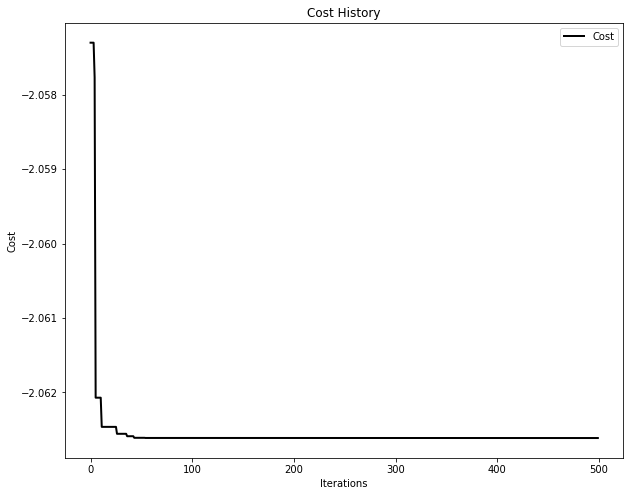

In [3]:
# Оптимизатор сохраняет всю историю расчетов, поэтому можем нарисовать графики
plot_cost_history(optimizer.cost_history) # график функции ошибки (величина функции в глобально лучшем положении)
plt.show() #

In [4]:
# Для анимации частиц надо задать линии контура функции, ограничения просмотра.
# В этом помогут классы Mesher и Designer
from pyswarms.utils.plotters.formatters import Mesher, Designer
# 
m = Mesher(func=func, # функция, которая будет рисоваться
           delta=0.3, # шаг сетки рисования для линий уровня
           levels=10, # число линий уровня
           limits=[(-10,10), (-10,10)]) # границы сетки рисования
# настройки графического окна
d = Designer(figsize=(10,8),# размер окна
             limits=[(-10,10), (-10,10), (-3,0)],# область просмотра по xyz координатам
             label=['x-axis', 'y-axis', 'z-axis'])# названия осей

Colab не очень подходит для анимации, поэтому рисовать анимацию будем так: сначала создадим объект анимации, сконвертируем его в видео, а потом это видео отобразим. Это потребует времени на конвертацию.

2021-02-22 10:24:07,133 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2021-02-22 10:24:07,137 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 720x576 -pix_fmt rgba -r 12.5 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmp0zm4tngm/temp.m4v


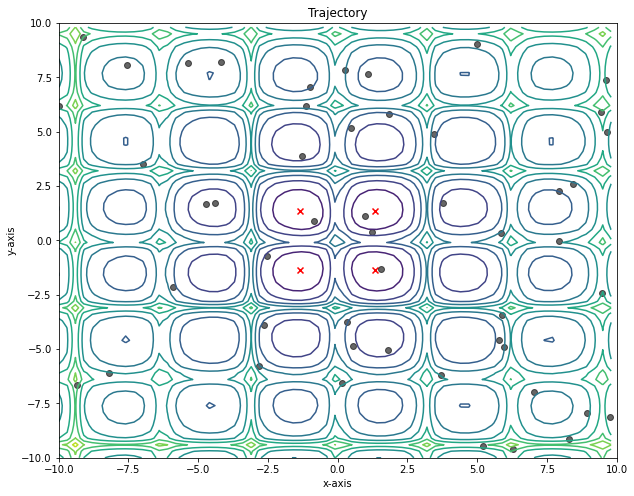

In [7]:
from matplotlib import animation, rc
# рисуем контурный график функциии движение частиц на нем.
anim=plot_contour(pos_history=optimizer.pos_history,# откуда брать "историю" движения частиц
                  mesher=m,# контур функции
                  designer=d,# опции граф. окна
                  mark=((1.34941,  1.34941,-1.34941,-1.34941),# отметим глобальные минимумы вручную, х координаты
                        (1.34941, -1.34941, 1.34941,-1.34941)));# у координаты. У нас 4 одинаковых глобальных минимума

from IPython.display import Image, HTML, display
rc('animation', html='html5')
display(anim)


2021-02-22 10:25:57,883 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2021-02-22 10:25:57,886 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 720x576 -pix_fmt rgba -r 12.5 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmp79yss4vk/temp.m4v


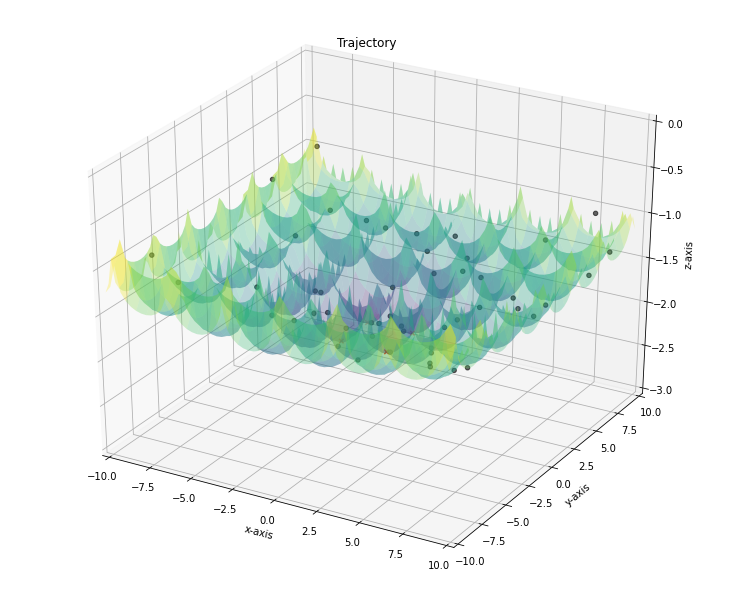

In [8]:
# Такой же график, но в 3D.
# Сначала пересчитаем в 3D представление
pos_history_3d = m.compute_history_3d(optimizer.pos_history) #
# Нарисуем, аргументы такие же
animation3d = plot_surface(pos_history=pos_history_3d,
                           mesher=m, designer=d,
                           mark=((1.34941,  1.34941,-1.34941,-1.34941),# отметим глобальные минимумы вручную, х координаты
                                ( 1.34941, -1.34941, 1.34941,-1.34941),# y координаты
                                (-2.06261, -2.06261,-2.06261,-2.06261)));# z координаты

from IPython.display import Image, HTML, display
rc('animation', html='html5')
display(animation3d)

Мы научились оптимизировать сложные функции без расчета градиента. 
Пробуйте другие функции, изменяйте опции метода (например, число частиц) и смотрите, как это повлияет на точность и время оптимизации.  

# Генетические алгоритмы 
Другой вид эволюционных методов это генетические алгоритмы. Они подсмотрены в природе и заключаются в следующем:
* имеем набор (популяцию) объектов, теперь называем их "особи".
* каждая особь обладает какими-то свойствами, которые зависят от ее **генетического кода**. Генетический код может быть представлен по-разному, например в виде строки битов, символов, чисел и т.п. Важно, что изменяя код, мы изменяем и свойства особи.
* Вводится **функция приспособленности**, которая показывает численно, насколько особь с данным кодом подходит для решения задачи. Т.е. функция приспособленности это функция от генетического кода. Она может быть очень-очень сложной, даже в неявном виде. (Например, код это правила движения игрока, а функция приспособленности - сколько очков набрал игрок) и, конечно, может быть не дифференцируемой.
* Рассчитываем функцию приспособленности для каждой особи в популяции
* Отбираем особей по некоторому правилу, варианты:
 - только лучших по функции приспособленности;
 - лучших и немного случайных особей и т.п.
* Используя код отобранных особей создаем новых особей. Тут много вариантов, например так:
 - взять двух особей, половину кода взять от первой особи, половину кода взять от второй особи - операция "скрещивания".
 - и случайно изменить некоторые элементы полученного кода (не очень сильно) - операция "мутации".
* Новых, созданных, особей добавляем в популяцию, а часть старых (или всех) удаляем из нее.
* Повторяем процесс, пока не решим задачу или не поймем, что не можем решить ее.

По-сути, такой метод описывает и эволюцию человека, но в отличии от природы, в искусственном виде у нас больше свободы, например можно делать скрещивание не от двух "родителей", а от трех, четырех, десяти... В искусственном же виде мы оптимизируем (обычно максимизируем) функцию приспособленности. 

Здесь красивейший пример ["генетических машинок"](https://rednuht.org/genetic_cars_2/). Форма машинки подбирается генетическим алгоритмом, а функция приспособленности - как далеко она проехала.

Поиграйте немного. Можно менять параметры метода:
* Mutation rate - как сильно будет изменяться код при мутации
* Mutation size - сколько элементов кода будет изменяться при мутации
* Elite clones - сколько лучших особей оставлять в популяции не изменяя их (это гарантирует, что мы не ухудшим решения, если все новые особи будут хуже)

### Пример
Воспользуемся библиотекой [pyeasyga](https://pyeasyga.readthedocs.io/en/latest/readme.html) для решения задачи о рюкзаке. Установим:

In [9]:
!pip install pyeasyga

  Created wheel for pyeasyga: filename=pyeasyga-0.3.1-py2.py3-none-any.whl size=6773 sha256=3886aa45dcd286ec28b8bae88134c81a815b4467c29565b9e5f076308c930bfa
  Stored in directory: /root/.cache/pip/wheels/ef/cf/ef/7aff9fcd6c1e59dc276182f29a32e7c197665dd5eb547f30e6
Successfully built pyeasyga


Если что-то не работает, альтернативно, чтобы установить эту библиотеку скопируем (клонируем) ее себе на диск, перейдем в директорию pyeasyga куда она скопировалась и выполним установочный файл setup.py. 

Если все хорошо, библиотека установлена. Это довольно простая библиотека, но активно развивается, поэтому возможны ошибки. Рабочая версия pyeasyga==0.3.1 

In [ ]:
#! git clone https://github.com/remiomosowon/pyeasyga.git
#! cd pyeasyga && python setup.py install

### Задача о рюкзаке
Задача о [рюкзаке](https://gist.github.com/remiomosowon/386f517175f5dc3f5e54): 
* Есть 5 предметов, которые мы можем положить в рюкзак.
* Вес этих предметов 12, 1, 4,  1 и 2 килограмма. 
* Эти предметы стоят 4,  2, 10, 1 и 2 доллара соответственно

Вопрос: какие предметы надо положить в рюкзак, так, чтобы максимизировать общую стоимость предметов в рюкзаке, но чтобы общий вес рюкзака был меньше или равен 15 килограмм?

Это типичная задача оптимизации с ограничениями. Сначала попробуйте решить ее самостоятельно, а затем решим ее с помощью генетического алгоритма.

Введем данные:

In [15]:
from pyeasyga import pyeasyga # подключим библиотеку. Так как она в директории pyeasyga, в которой есть директория pyeasyga, то указываем pyeasyga.pyeasyga  

# введем данные Название предмета, его стоимость и его вес. 5 штук.
data = [{'name': 'box1', 'value': 4, 'weight': 12}, # предмет 1
        {'name': 'box2', 'value': 2, 'weight': 1},  # предмет 2
        {'name': 'box3', 'value': 10, 'weight': 4}, # предмет 3
        {'name': 'box4', 'value': 1, 'weight': 1},  # предмет 4
        {'name': 'box5', 'value': 2, 'weight': 2}]  # предмет 5

Генетический код в нашем примере - бинарный вектор из 5 элементов, 1 показывает, что мы берем предмет, 0 - что нет. Инициализируем генетический алгоритм, в этой библиотеке используется бинарный генетический код.

In [16]:
# Инициализируем генетический алгоритм
ga = pyeasyga.GeneticAlgorithm(data)        #

Надо задать функцию приспособленности, как из стоимости и веса взятых предметов посчитать насколько это хорошая комбинация.

Мы хотим максимизировать общую стоимость предметов в рюкзаке, значит надо ее найти, т.е. посчитать сумму стоимостей предметов, у которых ген равен 1. Но если при это общий вес (его тоже считаем) превысит 15, то функция приспособленности должна быть маленькой (у нас 0). 

В библиотеке функция приспособленности принимает два аргумента: конкретная особь, т.е. генетический код и данные, которые к этой особи относятся, те которые мы и задавали: вес и стоимость.

Для каждой "особи", т.е. для каждого варианта решения, эта функция будет вызываться отдельно. 

In [17]:
# функция приспособленности
def fitness(individual, data):
    # individual - генетический код особи
    # data - данные по генам 
    values, weights = 0, 0 # сбросим переменные общего веса и стоимости рюкзака
    # в цикле по количеству генов (элементов ген. кода, их 5 штук) будем перебирать элемент кода и данные к нему относящиеся
    for selected, box in zip(individual, data): 
        if selected: # если ген = 1 (значит что мы берем предмет)
            values += box.get('value') # увеличиваем общую стоимость на величину стоимости этого предмета
            weights += box.get('weight') # увеличиваем общий вес на величину веса этого предмета
    if weights > 15: # но если общий вес превысил 15
        values = 0 # стоимость сбрасываем.
    return values # возвращаем общую стоимость

Теперь можно запустить расчет.

In [18]:
ga.fitness_function = fitness # указываем функцию приспособленности
ga.run() # запускаем расчет генетического алгоритма.
print(ga.best_individual()) # выводим код лучшей особи, она и есть решение.

(15, [0, 1, 1, 1, 1])


Итак, наше решение показывает, что нужно взять все предметы, кроме первого, наиболее тяжелого (аж 12 кг), но с невысокой стоимостью. Логично, а вы сами до этого додумались? Общая стоимость будет равна 15 долларам. 



Для более сложных случаев в `GeneticAlgorithm()`  можно указывать параметры генетического метода: 

* population_size=10 - размер популяции (число особей)
* generations=20, - число итераций (поколений) расчета
* crossover_probability=0.8, - вероятность скрещивания
* mutation_probability=0.05, - вероятность мутации
* elitism=True, - сохранять ли лучших особей с предыдущей итерации 
* maximise_fitness=True - максимизировать ли функцию принадлежности.

Попробуйте поменять параметры. 
Увеличьте размер рюкзака, число предметов.


# Заключение
Эволюционные методы разнообразны, постоянно появляются новые модификации их, но по своей природе это методы *случайного* поиска. И никто не гарантирует, что решение будет найдено. Поэтому на практике такие методы применяются, когда альтернативы нет, например для сложных не дифференцируемых функций, которые мы не можем оптимизировать градиентными методами. 

## Ссылки

использованы и адаптированы материалы:

https://pyswarms.readthedocs.io/en/latest/index.html

https://github.com/remiomosowon/pyeasyga




